# Kmeans for pre-processing,  dimensionality reduction

We will look at the idea of using K-means to reduce the dimensionality of the data, for the MNIST data set

The idea is to work with the kMeans distances instead of the actual data

We will load and check the MNIST data first

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y=mnist["data"],mnist["target"]
print(X.shape)
print (y.shape)

(70000, 784)
(70000,)


In [3]:
X.shape

(70000, 784)

In [4]:
y=y.to_numpy()

In [5]:
X=X.to_numpy()

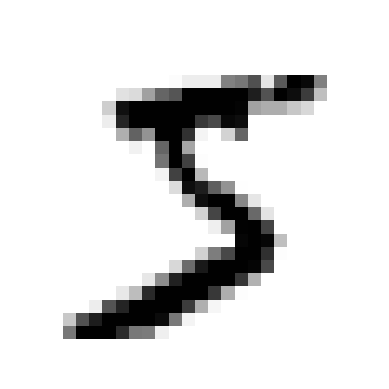

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0,:]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

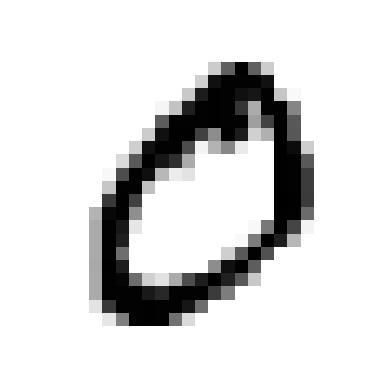

In [7]:
some_digit = X[1,:]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
y[1]

'0'

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Now try a logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [11]:
log_reg.score(X_test, y_test)

0.9159428571428572

In [12]:
# for comparison, a neural net

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,10,5), verbose=True, warm_start=False)

clf.fit(X_train, y_train)


Iteration 1, loss = 2.82213997
Iteration 2, loss = 2.07106501
Iteration 3, loss = 1.90243617
Iteration 4, loss = 1.66807508
Iteration 5, loss = 1.55054313
Iteration 6, loss = 1.45430995
Iteration 7, loss = 1.36381451
Iteration 8, loss = 1.29761536
Iteration 9, loss = 1.24501438
Iteration 10, loss = 1.20149847
Iteration 11, loss = 1.15932219
Iteration 12, loss = 1.04235567
Iteration 13, loss = 0.93920861
Iteration 14, loss = 0.89065363
Iteration 15, loss = 0.83748388
Iteration 16, loss = 0.73418295
Iteration 17, loss = 0.67435292
Iteration 18, loss = 0.64117737
Iteration 19, loss = 0.57399774
Iteration 20, loss = 0.51767138
Iteration 21, loss = 0.48462613
Iteration 22, loss = 0.45716665
Iteration 23, loss = 0.43917925
Iteration 24, loss = 0.42660637
Iteration 25, loss = 0.41378962
Iteration 26, loss = 0.40142295
Iteration 27, loss = 0.39357393
Iteration 28, loss = 0.38597419
Iteration 29, loss = 0.37843995
Iteration 30, loss = 0.37586703
Iteration 31, loss = 0.36520516
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 5), max_iter=500,
              random_state=1, verbose=True)

In [14]:
y_pred=clf.predict(X_train)


print( sum(y_pred==y_train)/len(y_pred) )

0.9832190476190477


# Can we reduce the dimensionality of the data and get higher performance in the logisitc regression

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(max_iter=300)),
])
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=300))])

In [16]:
pipeline.score(X_test, y_test)

0.8960571428571429

In [17]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100)),
    ("log_reg", LogisticRegression(max_iter=300)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9078857142857143

# We can do a grid search to optimize the k value used in the k means reduction

# Warning- this takes a long time to run

In [19]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=30)),
    ("log_reg", LogisticRegression(max_iter=100)),
])


from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=[100,200,300])
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time= 5.4min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time= 6.3min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time= 5.5min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=200; total time= 8.6min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=200; total time= 8.5min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=200; total time= 8.5min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=300; total time=12.1min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=300; total time=12.4min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=300; total time=10.7min


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=30)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': [100, 200, 300]}, verbose=2)

In [20]:
grid_clf.best_params_


{'kmeans__n_clusters': 300}

In [21]:
grid_clf.cv_results_

{'mean_fit_time': array([344.58647633, 513.17113201, 701.44186425]),
 'std_fit_time': array([24.50236291,  3.88810942, 45.17352475]),
 'mean_score_time': array([0.28950437, 0.43093578, 0.58666682]),
 'std_score_time': array([0.07621391, 0.14219844, 0.16891856]),
 'param_kmeans__n_clusters': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kmeans__n_clusters': 100},
  {'kmeans__n_clusters': 200},
  {'kmeans__n_clusters': 300}],
 'split0_test_score': array([0.8716    , 0.8712    , 0.87771429]),
 'split1_test_score': array([0.87748571, 0.87822857, 0.87731429]),
 'split2_test_score': array([0.87291429, 0.87605714, 0.87691429]),
 'mean_test_score': array([0.874     , 0.8751619 , 0.87731429]),
 'std_test_score': array([0.0025225, 0.0029384, 0.0003266]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}